<a href="https://colab.research.google.com/github/SIVAKAMISREEJHA-G/PRODIGY-INFOTECH/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
n_customers = 200
purchase_frequency = np.random.randint(1, 100, n_customers)
average_purchase_value = np.random.randint(10, 1000, n_customers)

In [ ]:
data = pd.DataFrame({
    'CustomerID': range(n_customers),
    'PurchaseFrequency': purchase_frequency,
    'AveragePurchaseValue': average_purchase_value
})

In [ ]:
X = data[['PurchaseFrequency', 'AveragePurchaseValue']]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


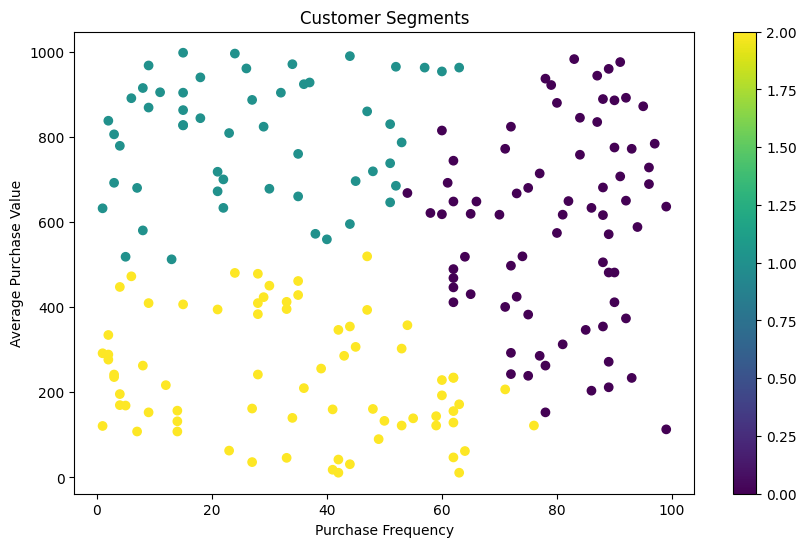

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['PurchaseFrequency'], data['AveragePurchaseValue'],
                      c=data['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Purchase Value')
plt.title('Customer Segments')
plt.show()

In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i} center: Purchase Frequency = {center[0]:.2f}, "
          f"Average Purchase Value = {center[1]:.2f}")


Cluster 0 center: Purchase Frequency = 79.84, Average Purchase Value = 592.25
Cluster 1 center: Purchase Frequency = 27.36, Average Purchase Value = 799.79
Cluster 2 center: Purchase Frequency = 33.82, Average Purchase Value = 235.03


In [ ]:
for i in range(n_clusters):
    cluster_data = data[data['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Number of customers: {len(cluster_data)}")
    print(f"Average Purchase Frequency: {cluster_data['PurchaseFrequency'].mean():.2f}")
    print(f"Average Purchase Value: {cluster_data['AveragePurchaseValue'].mean():.2f}")


Cluster 0:
Number of customers: 75
Average Purchase Frequency: 79.84
Average Purchase Value: 592.25

Cluster 1:
Number of customers: 53
Average Purchase Frequency: 27.36
Average Purchase Value: 799.79

Cluster 2:
Number of customers: 72
Average Purchase Frequency: 33.82
Average Purchase Value: 235.03
